# Figure effect sizes

In [1]:
% matplotlib inline
import numpy
import seaborn
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import palettable.colorbrewer as cb

/Users/Joke/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Read in table

In [2]:
lines=[i.strip().split(',') for i in open('es.csv').readlines()]

task=[]
region=[]
roisize=[]
cohend=[]
pctsig=[]
desc=[]

for i in range(len(lines)):
    task.append(lines[i][0])
    region.append(lines[i][1])
    desc.append(lines[i][0]+': '+lines[i][1])
    roisize.append(int(lines[i][2]))
    cohend.append([float(j) for j in lines[i][3:6]])
    pctsig.append([float(j) for j in lines[i][6:9]])



## Read in values within each mask

In [3]:
cohen = []
percent = []
condition = []
conn = []
for i in range(len(task)):
    CD = [float(x.strip()) for x in open(os.path.join("EffectSize",'cohensd_'+task[i]+"_"+region[i]+".csv"))]
    cohen = cohen+CD
    PB = [float(x.strip()) for x in open(os.path.join("EffectSize",'percent_'+task[i]+"_"+region[i]+".csv"))]
    percent = percent+PB
    des = str(task[i])+": "+str(region[i]+" ("+str(roisize[i])+")")
    conn = conn+np.repeat(i,len(PB)).tolist()
    condition = condition+np.repeat(des,len(PB)).tolist()

#cohen = np.array(cohen)[cohen<np.nanpercentile(cohen,99.5)]
#percent = np.array(percent)[percent<np.nanpercentile(percent,99.5)]

In [4]:
Effect = {}
Effect['cohen']=pd.Series(cohen)
Effect['percent']=pd.Series(percent)
Effect['condition']=pd.Series(condition)
Effect['conn']=pd.Series(conn)

Effect = pd.DataFrame(Effect)
Effect[1:10]

,cohen,condition,conn,percent
1,0.516668,MOTOR: Precentral Gyrus (12894),0,5.88896
2,0.530300,MOTOR: Precentral Gyrus (12894),0,5.61860
3,0.568112,MOTOR: Precentral Gyrus (12894),0,6.00041
4,0.538906,MOTOR: Precentral Gyrus (12894),0,6.06095
5,0.538859,MOTOR: Precentral Gyrus (12894),0,5.75051
6,0.638390,MOTOR: Precentral Gyrus (12894),0,6.09297
7,0.795841,MOTOR: Precentral Gyrus (12894),0,6.38119
8,0.894414,MOTOR: Precentral Gyrus (12894),0,7.08745
9,0.897098,MOTOR: Precentral Gyrus (12894),0,8.06125


In [5]:
print("CHECK IF COHENS D ARE SAME AS IN TABLE")
print("\n")
for i in range(len(task)):
    ind = [Effect['cohen'][ind] for ind, x in enumerate(conn) if x==i]
    med = np.nanmedian(ind)
    print(task[i]+"_"+region[i]+": median = "+str(med))

print("\n")
print("CHECK IF PERCENTAGES ARE SAME AS IN TABLE")
print("\n")
for i in range(len(task)):
    ind = [Effect['percent'][ind] for ind, x in enumerate(conn) if x==i]
    med = np.nanmedian(ind)
    print(task[i]+"_"+region[i]+": median = "+str(med))

CHECK IF COHENS D ARE SAME AS IN TABLE


MOTOR_Precentral Gyrus: median = 0.627554
MOTOR_Supplementary motor cortex: median = 0.715603
MOTOR_Left putamen: median = 0.513091
MOTOR_Right putamen: median = 0.36863
WM_Middle frontal gyrus: median = 0.4739095
EMOTION_Left amygdala: median = 0.53432
EMOTION_Right amygdala: median = 0.6445395
GAMBLING_Left accumbens: median = 0.309702
GAMBLING_Right accumbens: median = 0.331828


CHECK IF PERCENTAGES ARE SAME AS IN TABLE


MOTOR_Precentral Gyrus: median = 2.70636
MOTOR_Supplementary motor cortex: median = 4.03236
MOTOR_Left putamen: median = 2.38602
MOTOR_Right putamen: median = 1.69554
WM_Middle frontal gyrus: median = 1.97199
EMOTION_Left amygdala: median = 2.39573
EMOTION_Right amygdala: median = 2.69845
GAMBLING_Left accumbens: median = 1.69791
GAMBLING_Right accumbens: median = 1.96107


## Figure

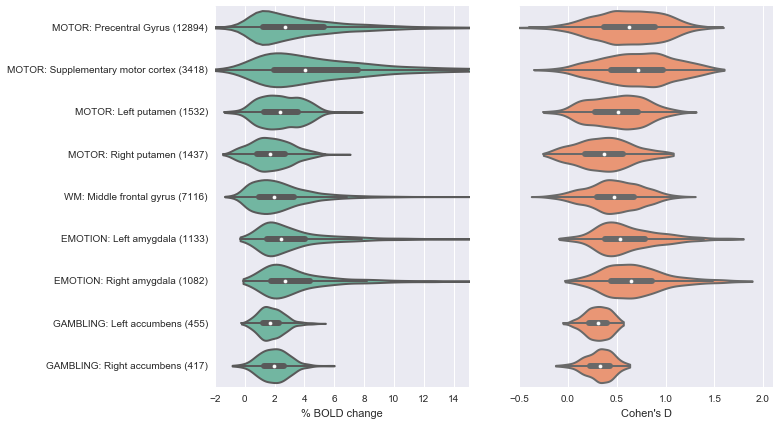

In [8]:
cols = cb.qualitative.Set2_8.mpl_colors

plt.figure(1,figsize=(10,15))

plt.subplot(2,2,1)
ax = seaborn.violinplot(x="percent", y="condition",cut=0,
                        inner = 'box',color=cols[0],
                     data=Effect,scale='width',width=0.8,
                       linewidth=2,sharex=False,sharey=False)
ax.set(xlim=(-2,15))
ax.set_xlabel("% BOLD change")
ax.set_ylabel("")

plt.subplot(2,2,2)
ax2 = seaborn.violinplot(x="cohen", y="condition",cut=0,
                         inner='box',color=cols[1],
                     data=Effect,scale='width',widht=0.8,
                       linewidth=2,sharex=False,sharey=False)
ax2.set(xlim=(-0.5,2.1))
ax2.yaxis.set_visible(False)
ax2.set_xlabel("Cohen's D")

plt.savefig('Figure1.pdf',bbox_inches='tight')
